In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# MINIST IMAGE ---> TO TENSOR

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

In [7]:
test_data= datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
type(train_data[0])

tuple

In [13]:
image, label = train_data[0]

In [14]:
image.shape

torch.Size([1, 28, 28])

In [15]:
image.dtype

torch.float32

In [16]:
label

5

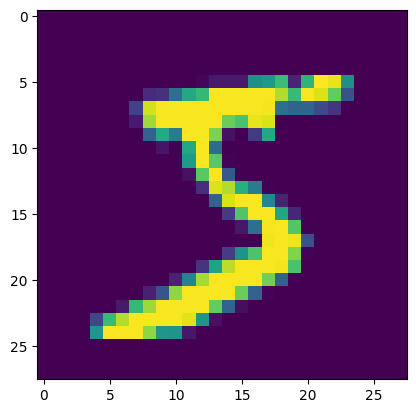

In [17]:
plt.imshow(image.reshape(28, 28))

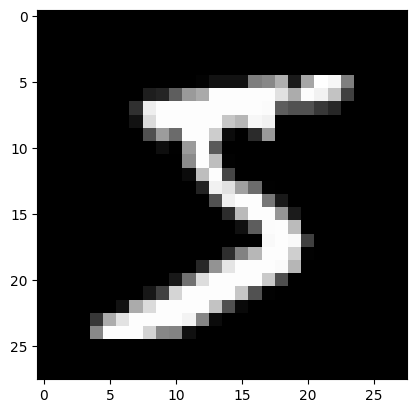

In [18]:
plt.imshow(image.reshape((28, 28)), cmap='gray')

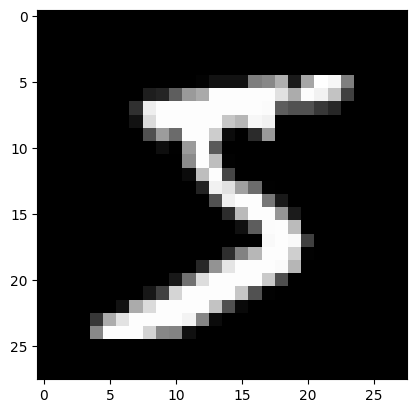

In [19]:
plt.imshow(image.reshape((28, 28)), cmap='gist_gray')

In [20]:
torch.manual_seed(101)
train_loader= DataLoader(train_data, batch_size=32, shuffle=True)
test_loader=DataLoader(test_data, batch_size=100, shuffle=False)

In [21]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #formatting ask gpt

In [22]:
# first_batch
for images, labels in train_loader:
    break

In [23]:
images # now we have images in batch

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [24]:
images.shape # note the shape also changes

torch.Size([32, 1, 28, 28])

In [25]:
labels.shape

torch.Size([32])

Labels: [   7    2    3    5    8    5    3    6    9    9    1    3]


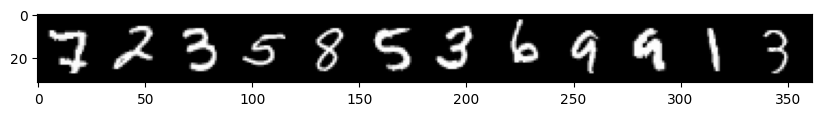

In [26]:
print('Labels:', labels[:12].numpy())

#print 12 images
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [27]:
class MultiLaywerPerception(nn.Module):
    def __init__(self, input_size=784, out_size=10, layers=[120,849]):
        super().__init__()
        self.fc1=nn.Linear(input_size, layers[0])
        self.fc2=nn.Linear(layers[0], layers[1])
        self.fc3=nn.Linear(layers[1], out_size)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1) # muiltclass 
    

In [28]:
torch.manual_seed(101)
model= MultiLaywerPerception()
model

MultiLaywerPerception(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=849, bias=True)
  (fc3): Linear(in_features=849, out_features=10, bias=True)
)

In [29]:
for param in model.parameters():
    print(param.numel())

94080
120
101880
849
8490
10


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [31]:
images.shape #----> [32, 784]

torch.Size([32, 1, 28, 28])

In [32]:
images.view(32, -1).shape

torch.Size([32, 784])

In [33]:
import time
import torch

start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        # Flatten input
        y_pred = model(X_train.view(X_train.size(0), -1))
        loss = criterion(y_pred, y_train)

        # Calculate number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print mini-batch stats
        if (b + 1) % 10 == 0:
            acc = (trn_corr.item() / ((b + 1) * X_train.size(0))) * 100
            print(f'epoch {i+1} batch {b+1} loss: {loss.item():.4f} accuracy: {acc:.2f}%')

    # Store training results
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    # Evaluate on test set
    with torch.no_grad():
        for X_test, y_test in test_loader:
            y_val = model(X_test.view(X_test.size(0), -1))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

        loss = criterion(y_val, y_test)
        test_losses.append(loss.item())
        test_correct.append(test_corr.item())

# Calculate accuracy for each epoch
train_acc = [correct / len(train_loader.dataset) for correct in train_correct]
test_acc = [correct / len(test_loader.dataset) for correct in test_correct]

# Print overall accuracy per epoch
for i in range(epochs):
    print(f"Epoch {i+1}: Train Accuracy = {train_acc[i]*100:.2f}%, Test Accuracy = {test_acc[i]*100:.2f}%")

# Total training duration
total_time = time.time() - start_time
print(f'Duration: {total_time / 60:.2f} minutes')


epoch 1 batch 10 loss: 2.0275 accuracy: 16.88%
epoch 1 batch 20 loss: 1.3984 accuracy: 34.38%
epoch 1 batch 30 loss: 1.0698 accuracy: 46.98%
epoch 1 batch 40 loss: 0.6700 accuracy: 53.28%
epoch 1 batch 50 loss: 0.6759 accuracy: 57.81%
epoch 1 batch 60 loss: 0.6777 accuracy: 62.14%
epoch 1 batch 70 loss: 0.2671 accuracy: 64.82%
epoch 1 batch 80 loss: 0.6072 accuracy: 67.27%
epoch 1 batch 90 loss: 0.3822 accuracy: 69.44%
epoch 1 batch 100 loss: 0.5447 accuracy: 71.34%
epoch 1 batch 110 loss: 0.7844 accuracy: 72.76%
epoch 1 batch 120 loss: 0.5903 accuracy: 74.04%
epoch 1 batch 130 loss: 0.2718 accuracy: 75.12%
epoch 1 batch 140 loss: 0.3727 accuracy: 76.18%
epoch 1 batch 150 loss: 0.5635 accuracy: 77.15%
epoch 1 batch 160 loss: 0.3210 accuracy: 77.95%
epoch 1 batch 170 loss: 0.7575 accuracy: 78.66%
epoch 1 batch 180 loss: 0.4804 accuracy: 79.18%
epoch 1 batch 190 loss: 0.5177 accuracy: 79.75%
epoch 1 batch 200 loss: 0.1496 accuracy: 80.47%
epoch 1 batch 210 loss: 0.2548 accuracy: 81.10%
e

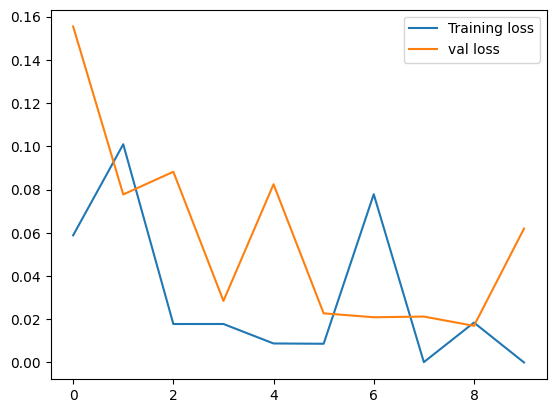

In [34]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='val loss')
plt.legend()

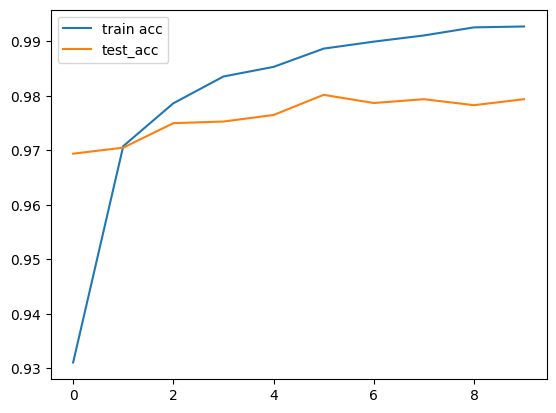

In [35]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test_acc')
plt.legend()

In [36]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [37]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted==y_test).sum()


In [38]:
100*correct.item()/len(test_data)

97.94

In [39]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 966,    0,    0,    0,    0,    0,    4,    0,    4,    1],
       [   1, 1126,    0,    0,    0,    0,    2,    4,    1,    3],
       [   2,    5, 1020,    7,    3,    0,    1,    8,    5,    0],
       [   1,    0,    1,  972,    0,    6,    1,    2,    1,    1],
       [   0,    0,    1,    1,  957,    1,    3,    0,    1,    5],
       [   2,    0,    1,    7,    0,  870,   11,    1,    2,    1],
       [   2,    2,    0,    0,    5,    3,  934,    0,    0,    0],
       [   2,    0,    8,    5,    2,    2,    0, 1006,    3,    7],
       [   1,    2,    1,    9,    0,    4,    2,    0,  953,    1],
       [   3,    0,    0,    9,   15,    6,    0,    7,    4,  990]])

In [40]:
transform = transforms.ToTensor()

In [41]:
train_dataloader = DataLoader(train_data, batch_size = 10, shuffle= True)
test_dataloader = DataLoader(test_data, batch_size = 10, shuffle= False)

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvolutionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # This was missing / overwritten

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16 * 5 * 5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)


In [43]:
model_2 = ConvolutionNetwork()
model_2

ConvolutionNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
for param in model_2.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [45]:
criterion_2 = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=0.001)

In [46]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_dataloader):
        b+=1
        
        # Apply the model
        y_pred = model_2(X_train)  # we don't flatten X-train here
        loss = criterion_2(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer_2.zero_grad()
        loss.backward()
        optimizer_2.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_dataloader):

            # Apply the model
            y_val = model_2(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.18958130  accuracy:  76.533%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.30873600  accuracy:  85.067%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.53817785  accuracy:  88.444%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.03276763  accuracy:  90.338%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00249781  accuracy:  91.483%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.02651232  accuracy:  92.400%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.02413235  accuracy:  93.093%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.03731980  accuracy:  93.623%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00189445  accuracy:  94.028%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.00432332  accuracy:  94.400%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.01319407  accuracy:  98.100%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.00270933  accuracy:  98.158%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.03117970  accuracy:  98.128%
epoch:  1  b

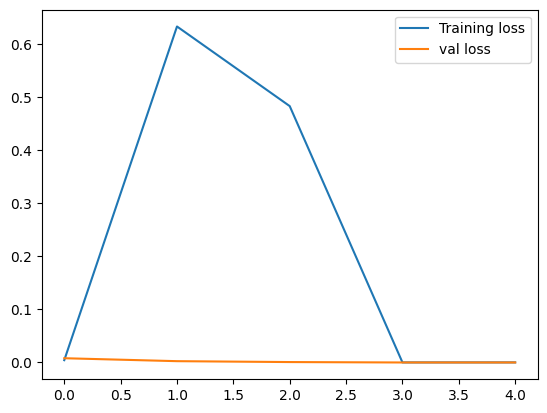

In [47]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='val loss')
plt.legend()

In [56]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[   1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1]])

In [48]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        # placeholder, will update later dynamically
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=1, out_features=output_shape)  # placeholder
        )

        # Dynamically set the Linear layer input features
        self._initialize_classifier(hidden_units, output_shape)

    def _initialize_classifier(self, hidden_units: int, output_shape: int):
        with torch.no_grad():
            dummy_input = torch.randn(1, 1, 28, 28)  # MNIST image size
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            flattened_features = x.view(1, -1).shape[1]
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_features, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x


In [49]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module):

    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        y_preds = model(X)

        loss = loss_fn(y_preds, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred_class)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


In [50]:
def test_step(model: nn.Module,
              loss_fn: nn.Module,
              dataloader: torch.utils.data.DataLoader):
    model.eval()
    test_loss, test_acc = 0, 0  # ✅ Corrected initialization

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


In [51]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [52]:
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_3 = TinyVGG(input_shape=1, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1749 | train_acc: 0.9458 | test_loss: 0.0607 | test_acc: 0.9805
Epoch: 2 | train_loss: 0.0684 | train_acc: 0.9795 | test_loss: 0.0577 | test_acc: 0.9807
Epoch: 3 | train_loss: 0.0536 | train_acc: 0.9834 | test_loss: 0.0439 | test_acc: 0.9854
Epoch: 4 | train_loss: 0.0453 | train_acc: 0.9864 | test_loss: 0.0505 | test_acc: 0.9845
Epoch: 5 | train_loss: 0.0393 | train_acc: 0.9875 | test_loss: 0.0412 | test_acc: 0.9877
Epoch: 6 | train_loss: 0.0359 | train_acc: 0.9881 | test_loss: 0.0433 | test_acc: 0.9870
Epoch: 7 | train_loss: 0.0332 | train_acc: 0.9897 | test_loss: 0.0371 | test_acc: 0.9887
Epoch: 8 | train_loss: 0.0306 | train_acc: 0.9900 | test_loss: 0.0353 | test_acc: 0.9887
Epoch: 9 | train_loss: 0.0280 | train_acc: 0.9911 | test_loss: 0.0392 | test_acc: 0.9882
Epoch: 10 | train_loss: 0.0263 | train_acc: 0.9909 | test_loss: 0.0349 | test_acc: 0.9900
Total training time: 232.692 seconds


In [54]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

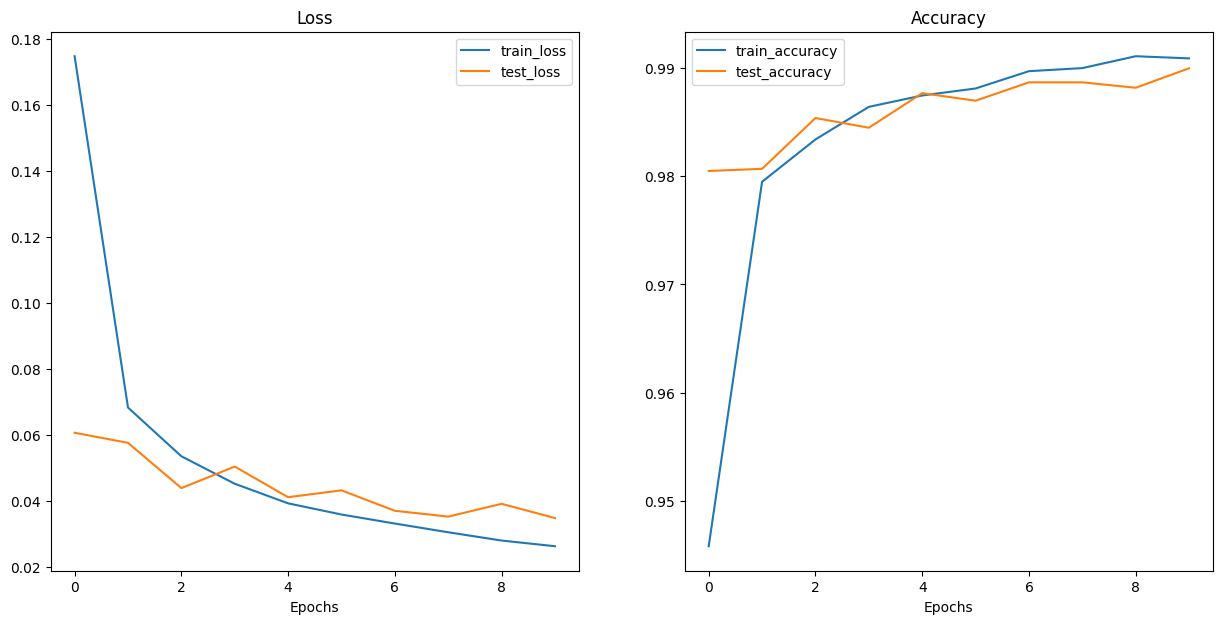

In [55]:
plot_loss_curves(model_3_results)